In [1]:
!pip3 install bertopic
!pip3 install algoliasearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.8 MB/s 
     |████████████████████████████████| 88 kB 5.7 MB/s 
     |████████████████████████████████| 5.2 MB 55.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 4.4 MB/s 
     |████████████████████████████████| 636 kB 52.5 MB/s 
     |████████████████████████████████| 5.5 MB 43.7 MB/s 
     |████████████████████████████████| 1.3 MB 56.3 MB/s 
     |████████████████████████████████| 182 kB 69.3 MB/s 
     |████████████████████████████████| 7.6 MB 45.4 MB/s 
     |████████████████████████████████| 1.1 MB 60.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp37-cp37m-linux_x86_64.whl size=2340689 sha256=3560f2b892c4e662d768388ef308ebdfb4c3107e25dc5d47e4d8b5c5ec257e47
  Stored in directory: /root/.cache

# Topic Modeling --> extract topics from docs, grousp them into topics and shows the main keywords in each topic

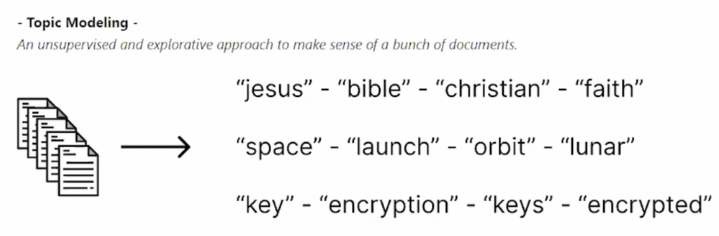

# BERTopic Pipeline 
1. SBERT for embeddings 
2. dimensionality reduction of embeddings with umap
3. HDBSCAN clustering, b/c it provides outliers
4. BOW extraction (topic extraction) 
5. Topic represenation with cTF-IDF and MMR methods

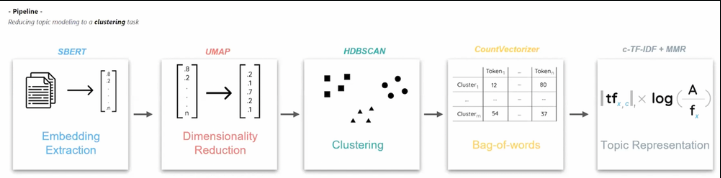

# Algorithms 
- BERTopic
- Top2Vec
- Latent Dirichlet Allocation (LDA)
- Non Negative Matrix Factorization (NMF)
- Latent Semantic Analysis (LSA)
- Parallel Latent Dirichlet Allocation (PLDA)
- Pachinko Allocation Model (PAM)

In [2]:
from bertopic import BERTopic
import algoliasearch.search_client
from getpass import getpass

In [3]:
app_id = getpass('Enter the app_id value: ')
api_key = getpass('Enter the api_key value: ')

Enter the app_id value: ··········
Enter the api_key value: ··········


In [4]:
# Initialize Algolia search client
client = algoliasearch.search_client.SearchClient.create(
        app_id, api_key)
index = client.init_index("asknature_searchable_posts")

In [5]:
res = index.browse_objects({'query': "", 'attributesToRetrieve': ['summary']})

In [6]:
summaries = []
summaries_dict = {}
ids = []
x = 0
for i in res:
  i["objectID"]
  x += 1
  summ = i["summary"]
  # print(i)
  if summ not in summaries:
    ids.append(i["objectID"])
    summaries.append(summ)
print(x)
print(len(summaries))

raw_summaries = summaries[1:]
summaries = summaries[1:]
print(summaries[0])

2242
2099
Wind turbines from Paris-Sorbonne University are flexible to reduce drag and create a more powerful stroke.



In [7]:
import nltk
nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
# tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else
# Then lowercase everything 

# Don't remove stop words or lemmatize yet!
# Don't remove digits yet!

tokenizer = RegexpTokenizer(r'\w+')
for i in range(len(summaries)):
  summaries[i] = tokenizer.tokenize(str(summaries[i]))
  summaries[i]  =  " ".join([word.lower() for word in summaries[i]])

'''summaries = summaries[1:]
nltk.pos_tag(summaries[1])'''
print(summaries[-1])

halobacteria produce chemical energy by capturing light energy with rhodopsin pigments and using it to pump protons out of the cell setting up a proton gradient used to generate atp


In [19]:
# https://stackoverflow.com/questions/71320201/how-to-fix-random-seed-for-bertopic
from umap import UMAP
# umap_model = UMAP(random_state=42)

In [20]:
# topic_model = BERTopic(umap_model=umap_model)
topic_model = BERTopic()

# Training procedure
topics, probs = topic_model.fit_transform(summaries)

In [21]:
topic_df = topic_model.get_topic_info()
topic_df

,Topic,Count,Name
0,-1,697,-1_of_the_to_from
1,0,140,0_fish_the_water_of
2,1,123,1_light_eyes_color_vision
3,2,92,2_this_biomimicry_students_nature
4,3,76,3_sponges_shell_of_the
5,4,70,4_heat_blood_cooling_temperature
6,5,49,5_wings_flight_lift_birds
7,6,48,6_diversity_ecosystems_species_disturbances
8,7,46,7_bees_nests_wasps_honeybees
9,8,44,8_bats_sound_ear_vampire


In [22]:
sum(topic_df.Count.to_list()) == len(summaries)

True

In [23]:
topic_model.get_topic(topic=24)

[('coating', 0.07108352296364116),
 ('surface', 0.05686603745877501),
 ('technology', 0.05272079203538456),
 ('university', 0.049614661713776605),
 ('uses', 0.04915324169307255),
 ('nano', 0.04668603092255476),
 ('reduce', 0.04347624316867146),
 ('from', 0.043181646459261744),
 ('that', 0.03516058058808168),
 ('lotus', 0.03501452319191607)]

In [24]:
import pandas as pd

In [25]:
doc_df = pd.DataFrame({'topic': topics, 'document': summaries})

In [26]:
topic_24 = doc_df[doc_df.topic == 24]
topic_24

,topic,document
10,24,thin film solar cells from caltech and karlsru...
20,24,surface coating from ucla and university of ch...
50,24,invented to deter harmful particle buildup in ...
170,24,metalmark uses 3 d nanostructured materials to...
173,24,spotless from spotless materials is a sprayabl...
257,24,greenshield from greenshield finish uses a nan...
263,24,explore resources for teaching about superhydr...
269,24,in this short activity created for museum envi...
289,24,aircoat is a marine coating that prevents biof...
298,24,lumachrome security labels from nanotech have ...


In [27]:
for i in topic_24.document.to_list():
  print(i)

thin film solar cells from caltech and karlsruhe institute of technology have disordered nanoholes that reduce light reflection
surface coating from ucla and university of chinese academy of sciences uses hierarchical micro and nano structures to elevate surface temperatures and shed condensed water droplets
invented to deter harmful particle buildup in medical devices design also could be used in industrial pipes and more
metalmark uses 3 d nanostructured materials to break down and filter out contaminants in the air
spotless from spotless materials is a sprayable coating that keeps surfaces clean without the use of harsh chemicals
greenshield from greenshield finish uses a nano textured self cleaning surface to dramatically reduce the amount of fluorochemicals needed to repel water and oil based stains
explore resources for teaching about superhydrophobicity and nanotechnology using the story of how super water repellent lotus leaves inspired self cleaning surface coatings
in this sh

In [28]:
# generate labels
'''topic_labels = topic_model.get_topic_labels(nr_words = 4, topic_prefix = False, word_length = 15, separator=" - ")
topic_model.set_topic_labels(topic_labels)'''


# create our own label
'''
topic_model.set_topic_labels({39: "University"})
topic_model.get_topic_info().head(10)
'''

'\ntopic_model.set_topic_labels({39: "University"})\ntopic_model.get_topic_info().head(10)\n'

In [29]:
# Change n-grams without re-fitting our entire model
# topic_model.update_topics(summaries, n_gram_range = (1,3))

# Merge Specific topics 
# topic_model.merge_topics(summaries, topics_to_merge=[1,8,12])

#Reduce the number of topics iteratively by merging them
# topic_model.reduce_topics(summaries, nr_topics=100)

# Find specific topics 
# topic__model.find_topics("decision trees", top_n = 1)

# Visualizations

# Remove Stop Words, Lemmatize





In [30]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [31]:
no_stop_word_summaries = raw_summaries

In [32]:
print(len(no_stop_word_summaries))

2098


In [33]:
stemmer = WordNetLemmatizer()

for i in range(len(no_stop_word_summaries)):
  no_stop_word_summaries[i] = tokenizer.tokenize(str(no_stop_word_summaries[i]))
  no_stop_word_summaries[i]  =  " ".join([word.lower() for word in no_stop_word_summaries[i] if word not in stopwords.words('english')])
  #no_stop_word_summaries[i] = " ".join([stemmer.lemmatize(word) for word in no_stop_word_summaries[i]])

In [34]:
no_stop_word_summaries[-1]

'halobacteria produce chemical energy capturing light energy rhodopsin pigments using pump protons cell setting proton gradient used generate atp'

In [35]:
print(no_stop_word_summaries[:5])

['wind turbines paris sorbonne university flexible reduce drag create powerful stroke', 'film university central florida tiny protuberances help reduce reflection damage', 'sampling device uc san diego claw like device collect soil samples minimal loss extraction', 'surgical sealant harvard double layered hydrogel effectively binds biological tissue without causing lasting damage', 'ceramic material harvard composed closed cell porous structure mitigates impact forces']


In [36]:
topic_model = BERTopic()

# Training procedure
topics, probs = topic_model.fit_transform(no_stop_word_summaries)

In [37]:
topic_df = topic_model.get_topic_info()
topic_df

,Topic,Count,Name
0,-1,750,-1_the_water_via_using
1,0,94,0_legs_feet_beetle_hind
2,1,94,1_this_students_biomimicry_nature
3,2,79,2_electric_fish_water_energy
4,3,63,3_leaves_larvae_protect_tree
5,4,49,4_shell_proteins_threads_sponges
6,5,45,5_uv_algae_radiation_corals
7,6,42,6_eyes_vision_eye_light
8,7,41,7_ants_ant_colonies_nests
9,8,41,8_wings_flight_lift_bird


In [38]:
sum(topic_df.Count.to_list()) == len(no_stop_word_summaries)

True

In [39]:
doc_df = pd.DataFrame({'topic': topics, 'document': no_stop_word_summaries})
topic_neg_one = doc_df[doc_df.topic == -1]
topic_neg_one

,topic,document
0,-1,wind turbines paris sorbonne university flexib...
1,-1,film university central florida tiny protubera...
5,-1,solar cells stanford honeycomb perovskite micr...
6,-1,cooling film ut austin finely structured trian...
10,-1,thin film solar cells caltech karlsruhe instit...
...,...,...
2087,-1,the membrane streptomyces lividans cells lets ...
2091,-1,the leaves potbelly airplant actively take ami...
2094,-1,the feathers birds fur mammals help conserve w...
2096,-1,chromatophores cephalopods provide active colo...


In [50]:
from bertopic import BERTopic
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=50, n_init=50)
# topic_model = BERTopic(hdbscan_model=cluster_model)

In [51]:
# reproducibility
umap_model = UMAP(n_neighbors=15, n_components=5, 
                  min_dist=0.0, metric='cosine', random_state=42)
topic_model = BERTopic(umap_model=umap_model, hdbscan_model=cluster_model)

In [52]:
topics, probs = topic_model.fit_transform(no_stop_word_summaries)
topic_df = topic_model.get_topic_info()
topic_df

,Topic,Count,Name
0,0,97,0_this_students_biomimicry_nature
1,1,75,1_bacteria_membrane_membranes_cell
2,2,67,2_enzymes_bacteria_metabolism_carbon
3,3,64,3_diversity_ecosystems_species_forest
4,4,61,4_legs_hind_feet_locust
5,5,59,5_shell_sponges_proteins_threads
6,6,58,6_antennae_olfactory_honeybees_male
7,7,55,7_material_structure_university_struts
8,8,55,8_water_vortex_swimming_sharks
9,9,54,9_leaves_water_roots_plants


In [43]:
import numpy as np

In [44]:
np.mean(topic_df.Count)

41.96

In [45]:
doc_df = pd.DataFrame({'topic': topics, 'document': raw_summaries})
topic_49 = doc_df[doc_df.topic == 49]
topic_49

,topic,document
16,49,microneedle ohio state university consists two...
28,49,surgical suture mcgill university slippery yet...
162,49,platelets leak mitigation sealant seal tite in...
322,49,smartwound jenkins group university bath banda...
443,49,despite lack nervous system slime molds learn ...
536,49,hookworms digest blood using cascade proteases
738,49,nozzles underneath bacteria eject slime propel...
760,49,mucin strands hagfish slime enable rapid slime...
892,49,glands hagfish secrete concentrated slime expa...
1044,49,the proteins within tallaganda velvet worm sli...


In [46]:
for i in topic_49.document.to_list():
  print(i)

microneedle ohio state university consists two needles work together reduce pain inflicted injections
surgical suture mcgill university slippery yet tough reducing irritation healing wounds
platelets leak mitigation sealant seal tite international uses free floating discrete particles seal leaks unknown locations
smartwound jenkins group university bath bandage special gel matrix alerts user infection occurred
despite lack nervous system slime molds learn share learn slime molds joining together time
hookworms digest blood using cascade proteases
nozzles underneath bacteria eject slime propel organism forwards backwards
mucin strands hagfish slime enable rapid slime formation transmitting forces flowing water
glands hagfish secrete concentrated slime expands rapidly protects predators via interacting fibers water holding proteins
the proteins within tallaganda velvet worm slime expanded grip lack secondary structure prevents binding
spermatophore squid attaches evagination using spiral